<a href="https://colab.research.google.com/github/DevAdedoyin/Stock-Market-Analysis/blob/master/Stock_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install, upgrade the yfinance package and install keras
!pip install --upgrade yfinance
!pip install --upgrade keras
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 999.1/999.1 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.0.1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.9 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.0.1
    Uninstalling keras-3.0.1:
      Successfully uninstalled keras-3.0.1


In [ ]:
# import the required libraries for the analysis
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from keras.utils import plot_model

In [ ]:
# download the Microsoft stock data
msft_ticker = yf.Ticker("msft")
msft_data = msft_ticker.history(period="36mo")
msft_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-12-14 00:00:00-05:00,207.526663,210.555326,207.312416,208.597885,28798400,0.0,0.0
2020-12-15 00:00:00-05:00,209.542548,209.786010,206.689185,208.529755,27000600,0.0,0.0
2020-12-16 00:00:00-05:00,209.133506,214.353323,209.104292,213.545029,35023300,0.0,0.0
2020-12-17 00:00:00-05:00,214.119594,215.112921,212.220596,213.681366,32515800,0.0,0.0
2020-12-18 00:00:00-05:00,212.873077,213.944314,210.370300,212.873077,63354900,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-08 00:00:00-05:00,369.200012,374.459991,368.230011,374.230011,20144800,0.0,0.0
2023-12-11 00:00:00-05:00,368.480011,371.600006,366.100006,371.299988,27708800,0.0,0.0
2023-12-12 00:00:00-05:00,370.850006,374.420013,370.459991,374.380005,24838300,0.0,0.0


In [ ]:
# extract and display the 'Close' prices
closing_prices = msft_data['Close']
closing_prices

Date
2020-12-14 00:00:00-05:00    208.597885
2020-12-15 00:00:00-05:00    208.529755
2020-12-16 00:00:00-05:00    213.545029
2020-12-17 00:00:00-05:00    213.681366
2020-12-18 00:00:00-05:00    212.873077
                                ...    
2023-12-08 00:00:00-05:00    374.230011
2023-12-11 00:00:00-05:00    371.299988
2023-12-12 00:00:00-05:00    374.380005
2023-12-13 00:00:00-05:00    374.369995
2023-12-14 00:00:00-05:00    365.500000
Name: Close, Length: 756, dtype: float64

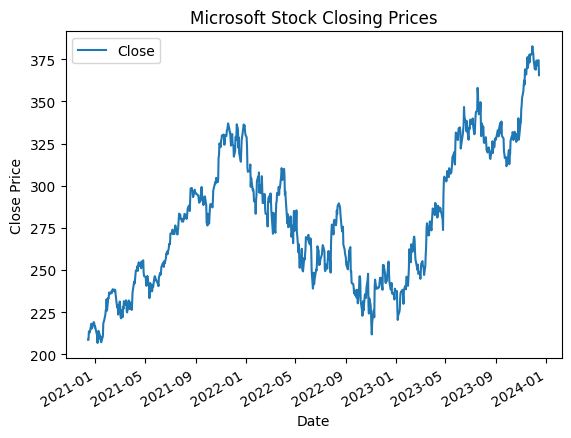

In [ ]:
# plot the original closing prices
msft_data.plot.line(y="Close", use_index=True)
plt.title("Microsoft Stock Closing Prices")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

In [ ]:
# normalize the closing prices using Min-Max scaling
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_prices = scaler.fit_transform(np.array(closing_prices)\
                                         .reshape(-1, 1))
normalized_prices

array([[0.0107898 ],
       [0.0104027 ],
       [0.03889839],
       [0.03967303],
       [0.03508051],
       [0.05721324],
       [0.06468306],
       [0.04852627],
       [0.0580985 ],
       [0.07032669],
       [0.06584489],
       [0.05217804],
       [0.05627257],
       [0.03010063],
       [0.03126271],
       [0.        ],
       [0.03342043],
       [0.04077972],
       [0.02899402],
       [0.01482902],
       [0.0226308 ],
       [0.00426064],
       [0.00221346],
       [0.02318419],
       [0.06689626],
       [0.07038227],
       [0.07580465],
       [0.09561355],
       [0.11110632],
       [0.11426028],
       [0.1476254 ],
       [0.10905914],
       [0.1516093 ],
       [0.15083458],
       [0.17014558],
       [0.16466753],
       [0.16571891],
       [0.16721287],
       [0.17440604],
       [0.16914951],
       [0.17838986],
       [0.18115654],
       [0.1740186 ],
       [0.17989727],
       [0.17762337],
       [0.16198408],
       [0.12615729],
       [0.119

In [ ]:
# split the dataset into training and testing sets
training_size = int(len(normalized_prices) * 0.80)
test_size = len(normalized_prices) - training_size
train_data, test_data = normalized_prices[
    0:training_size, :], normalized_prices[
        training_size:len(normalized_prices), :1]

look_back = 60

# Time series sequencing
train_generator = TimeseriesGenerator(train_data, train_data,
                                     length=look_back, batch_size=20)
test_generator = TimeseriesGenerator(test_data, test_data,
                                     length=look_back, batch_size=1)

training_size, test_size

(604, 152)

In [ ]:
# define a function to create input sequences for the LSTM model
def create_dataset(dataset, look_back=1):
    data_X, data_Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        data_X.append(a)
        data_Y.append(dataset[i + look_back, 0])
    return np.array(data_X), np.array(data_Y)

In [ ]:
# create input sequences for training and testing
X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)

# print shapes of training and testing sets
print("Training set shapes:", X_train.shape, y_train.shape)
print("Testing set shapes:", X_test.shape, y_test.shape)

Training set shapes: (543, 60) (543,)
Testing set shapes: (91, 60) (91,)


In [ ]:
# create the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")

# display the model's summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 60, 100)           60400     
                                                                 
 lstm_2 (LSTM)               (None, 60, 100)           80400     
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 231701 (905.08 KB)
Trainable params: 231701 (905.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


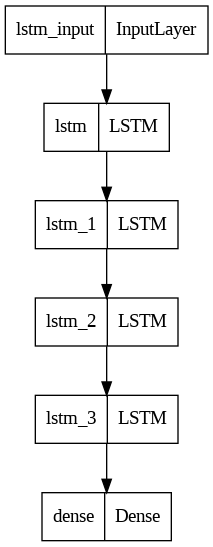

In [ ]:
# plot the LSTM model architechture
plot_model(model)

In [ ]:
# train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50,
          batch_size=64, verbose=1)

Epoch 1/50
9/9 [==============================] - 8s 309ms/step - loss: 0.0599 - val_loss: 0.1559
Epoch 2/50
9/9 [==============================] - 2s 244ms/step - loss: 0.0168 - val_loss: 0.0155
Epoch 3/50
9/9 [==============================] - 2s 172ms/step - loss: 0.0120 - val_loss: 0.0489
Epoch 4/50
9/9 [==============================] - 2s 171ms/step - loss: 0.0083 - val_loss: 0.0276
Epoch 5/50
9/9 [==============================] - 2s 174ms/step - loss: 0.0071 - val_loss: 0.0114
Epoch 6/50
9/9 [==============================] - 2s 173ms/step - loss: 0.0064 - val_loss: 0.0134
Epoch 7/50
9/9 [==============================] - 2s 175ms/step - loss: 0.0060 - val_loss: 0.0109
Epoch 8/50
9/9 [==============================] - 2s 169ms/step - loss: 0.0058 - val_loss: 0.0138
Epoch 9/50
9/9 [==============================] - 2s 246ms/step - loss: 0.0056 - val_loss: 0.0159
Epoch 10/50
9/9 [==============================] - 2s 173ms/step - loss: 0.0055 - val_loss: 0.0086
Epoch 11/50
9/9 [==

In [ ]:
# make the predictions on training and testing sets
train_predict = model.predict(train_generator)
test_predict = model.predict(test_generator)

# inverse the transform predictions to original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

92/92 [==============================] - 2s 19ms/step


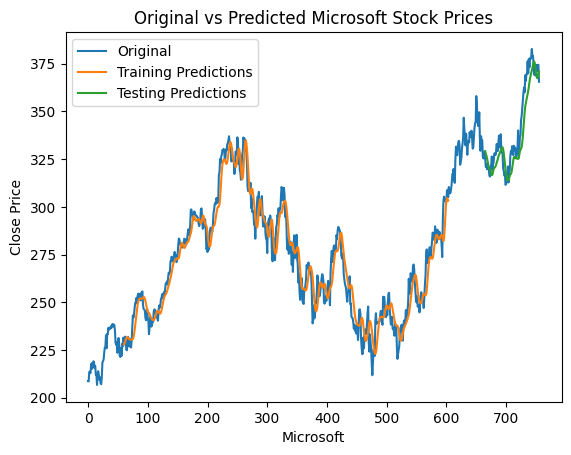

In [ ]:
# plot training and test predictions and actual values
train_predict_plot = np.empty_like(normalized_prices)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back:len(train_predict) + look_back, :] = train_predict

test_predict_plot = np.empty_like(normalized_prices)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (look_back * 2)
          + 1:len(normalized_prices), :] = test_predict[:len(normalized_prices)
          - len(train_predict) - (look_back * 2) - 1]

plt.plot(scaler.inverse_transform(normalized_prices))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.title("Original vs Predicted Microsoft Stock Prices")
plt.xlabel("Microsoft")
plt.ylabel("Close Price")
plt.legend(['Original', 'Training Predictions', 'Testing Predictions'])
plt.show()

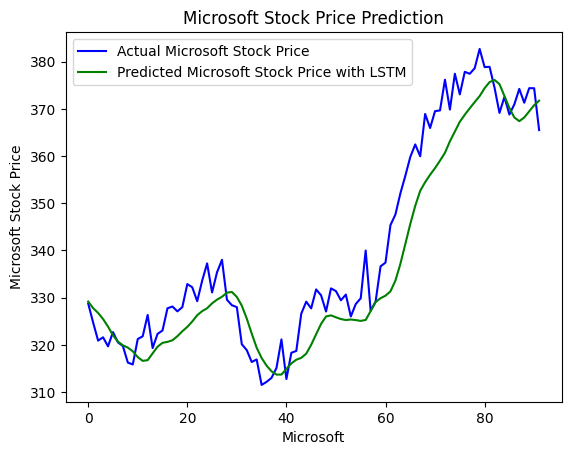

In [ ]:
actual_prices = scaler.inverse_transform(test_data[look_back:])
# Plot the data
plt.plot(actual_prices, color='blue', label='Actual Microsoft Stock Price')
plt.plot(test_predict, color='green',
         label='Predicted Microsoft Stock Price with LSTM')
plt.title('Microsoft Stock Price Prediction')
plt.xlabel('Microsoft')
plt.ylabel('Microsoft Stock Price')
plt.legend()
plt.show()

In [ ]:
def predict_future_days(model, base_data, days_to_predict, scaler,
                        look_back=2000):
    # Start with the last days of the base data
    input_data = base_data[-look_back:].reshape(1, look_back, 1)

    # Predict future days
    future_predictions = []

    for _ in range(days_to_predict):
        # Make a prediction
        prediction = model.predict(input_data)

        # Append the prediction
        future_predictions.append(prediction[0, 0])

        # Update the input data to include the prediction and exclude the
        # oldest data point
        # Correctly reshape the prediction to (1, 1, 1) before appending
        input_data = np.append(input_data[:, 1:, :],
                               prediction.reshape(1, 1, 1), axis=1)

    # Invert the scaling
    future_predictions = scaler.inverse_transform(
        np.array(future_predictions).reshape(-1, 1))

    return future_predictions

In [ ]:
# Predict next 100 days
days_to_predict = 100
future_days = predict_future_days(model, normalized_prices, days_to_predict,
                                  scaler, look_back)

1/1 [==============================] - 0s 32ms/step


In [ ]:
# predicted prices for the next 30days
print("Future predictions for the next 100 days:\n", future_days)

Future predictions for the next 30 days:
 [[370.8163 ]
 [368.9829 ]
 [367.17114]
 [365.6933 ]
 [364.46448]
 [363.34222]
 [362.26807]
 [361.2485 ]
 [360.2969 ]
 [359.40564]
 [358.54932]
 [357.6986 ]
 [356.8305 ]
 [355.9313 ]
 [354.9956 ]
 [354.02448]
 [353.0237 ]
 [352.00204]
 [350.96973]
 [349.93698]
 [348.91275]
 [347.90375]
 [346.91412]
 [345.94528]
 [344.99677]
 [344.06638]
 [343.1508 ]
 [342.2468 ]
 [341.35126]
 [340.46182]]


<ipython-input-24-bd29b1273404>:2: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  predicted_dates = pd.date_range(start=msft_data.index[-1],


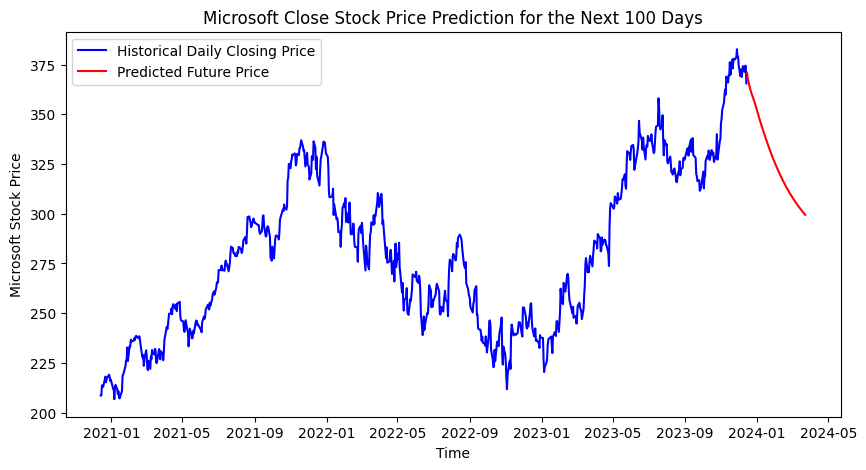

In [ ]:
# Plot the predictions
predicted_dates = pd.date_range(start=msft_data.index[-1],
                                periods=days_to_predict + 1, closed='right')
plt.figure(figsize=(10,5))
plt.plot(msft_data.index, msft_data['Close'], color='blue',
         label='Historical Daily Closing Price')
plt.plot(predicted_dates, future_days, color='red',
         label='Predicted Future Price')
plt.title(
  f'Microsoft Close Stock Price Prediction for the Next {days_to_predict} Days')
plt.xlabel('Time')
plt.ylabel('Microsoft Stock Price')
plt.legend()
plt.show()